# 0. Import Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:\\Users\\jacob\\Desktop\\PythonProjects\\Python_Project_1\\datasets_fun\\churn.csv")

In [3]:
X = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

X = X.astype('float32')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [51]:
y_train.head()

4524    0
5204    0
5900    0
657     0
143     0
Name: Churn, dtype: int64

# 1. Import Dependencies

In [52]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# 2. Build and Compile Model

In [53]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [54]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

# 3. Fit, Predict and Evaluate

In [55]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
177/177 [==============================] - 2s 5ms/step - loss: 0.5096 - accuracy: 0.7517
Epoch 2/200
177/177 [==============================] - 1s 3ms/step - loss: 0.4925 - accuracy: 0.7716
Epoch 3/200
177/177 [==============================] - 1s 3ms/step - loss: 0.4835 - accuracy: 0.7716
Epoch 4/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4771 - accuracy: 0.7775
Epoch 5/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4813 - accuracy: 0.7734
Epoch 6/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4752 - accuracy: 0.7792
Epoch 7/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4692 - accuracy: 0.7807
Epoch 8/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4707 - accuracy: 0.7821
Epoch 9/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4659 - accuracy: 0.7819
Epoch 10/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4635 - accura

<Axes: >

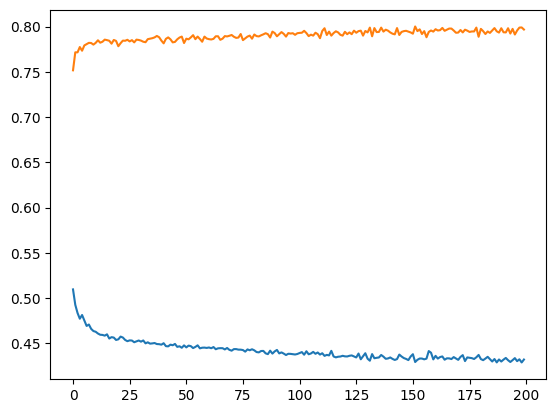

In [62]:
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()
history_df['accuracy'].plot()

In [ ]:
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]



for x in y_hat:
    result = "yes" if y_hat[x] == 1 else "no"
    print(f"{result}  predict float: {y_hat[x]}")

In [58]:
accuracy_score(y_test, y_hat)

0.7132718239886444

# 4. Saving and Reloading

In [59]:
model.save('tfmodel')

INFO:tensorflow:Assets written to: tfmodel\assets


INFO:tensorflow:Assets written to: tfmodel\assets


In [60]:
del model 

In [61]:
model = load_model('tfmodel')